In [6]:
%load_ext autoreload
%autoreload 2

from src.dbscan import *
from src.utils import *
from src.metrics import *
from src.clusterization_performance import *
from src.datasets import jain_dataset, example_from_lecture
from src.dbscanrn_optimalized import ti_dbscanrn
from src.dbscanrn import dbscanrn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Normalizer

np.random.seed(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DBSCAN vs DBSCANRN 

# Datasets

### Jain dataset

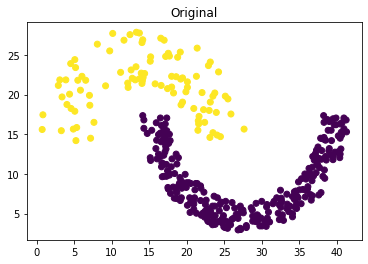

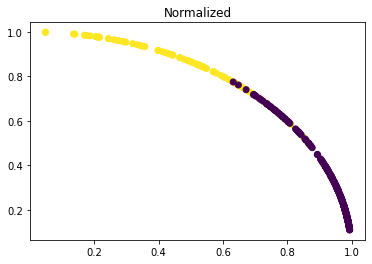

In [7]:
X, y = jain_dataset()
X_norm = Normalizer().fit_transform(X)

display_points(X, y, 'Original')
display_points(X_norm, y, 'Normalized')

# DBSCAN (euclidean distance)

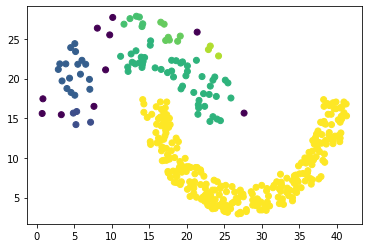

In [8]:
y_pred = dbscan(X=X, epsilon=2, minPts=3, similarity=euclidean_distance)
display_points(X, y_pred)
#evaluate(y_pred, y, X)

# DBSCANRN

### cosine dissimilarity, not optimized KNN

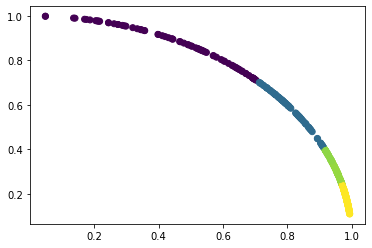

In [26]:
y_pred = dbscanrn(X=X_norm, k=30, similarity=cosine_dissimilarity)
display_points(X_norm, y_pred)

### cosine similarity, not optimized KNN

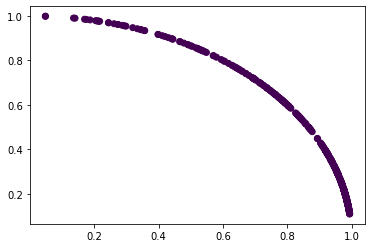

In [27]:
y_pred = dbscanrn(X=X_norm, k=30, similarity=cosine_similarity)
display_points(X_norm, y_pred)

### cosine dissimilarity, ti-KNN

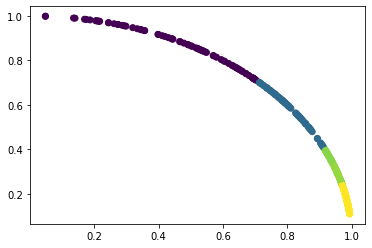

In [28]:
y_pred = ti_dbscanrn(X=X_norm, k=30, similarity=cosine_dissimilarity)
display_points(X_norm, y_pred)

### cosine similarity, ti-KNN

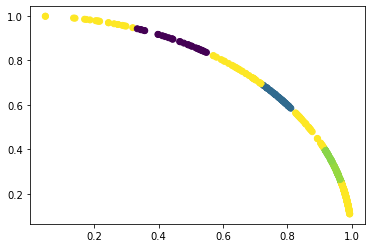

In [29]:
y_pred = ti_dbscanrn(X=X_norm, k=30, similarity=cosine_similarity)
display_points(X_norm, y_pred)

In [13]:
out = pd.DataFrame({
    'point id': np.arange(X.shape[0]),
    'x': X[:, 0],
    'y': X[:, 1],
    # '# of distance/similarity calculations': [],
    # 'point type': [], # 1 - core, 0 - border, -1 - noise
    # 'CId': [] # clusters: cluster identifier or -1 in the case of noise points
})

out

,point id,x,y
0,0,0.85,17.45
1,1,0.75,15.60
2,2,3.30,15.45
3,3,5.25,14.20
4,4,4.90,15.65
...,...,...,...
368,368,38.75,16.85
369,369,39.00,16.60
370,370,38.25,17.35
371,371,39.50,16.95


In [14]:
save_file(
    df=out, 
    file_type='OUT', 
    algorithm_name='dbscan', 
    dataset_name='example_from_lecture', 
    n_dimentions=X.shape[1], 
    n_rows=X.shape[0], 
    minPts='', 
    epsilon=''
)

In [15]:
# stat = pd.DataFrame({
#     'point id': [],
#     'x': [],
#     'y': [],
#     '# of distance/similarity calculations': [],
#     'point type': [],
#     'CId': []
# })
# out